In [69]:
from sklearn.decomposition import PCA
import synapseclient as sc
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
np.random.seed(100)
%matplotlib inline

In [2]:
syn = sc.login()

Welcome, aryton tediarjo!



In [40]:
entityV1 = syn.get("syn21027426")
dataV1   = pd.read_csv(entityV1["path"], index_col = 0)
dataV1 = dataV1.drop(["recordId", "phoneInfo", "createdOn", "healthCode", "gender", "age"], axis = 1)
dataV1 = dataV1.reset_index(drop = True)
dataV1["version"] = "V1"

In [112]:
entityV2 = syn.get("syn21027487")
dataV2   = pd.read_csv(entityV2["path"], index_col = 0)
dataV2 = dataV2.drop(["recordId", "phoneInfo", "createdOn", "healthCode", "gender"], axis = 1)
dataV2 = dataV2.reset_index(drop = True)
dataV2["version"] = "V2"

In [113]:
entityPassive = syn.get("syn21036367")
dataPassive   = pd.read_csv(entityPassive["path"], index_col = 0)
dataPassive = dataPassive.drop(["recordId", "phoneInfo", "createdOn", "healthCode", "gender"], axis = 1)
dataPassive = dataPassive.reset_index(drop = True)
dataPassive["version"] = "Passive"

In [114]:
data = pd.concat([dataV1, dataV2, dataPassive]).reset_index(drop = True)

# PCA

In [115]:
scaler = StandardScaler()
X = data.drop(["version", "PD"], axis = 1)
y = data[["version", "PD"]]

In [116]:
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components = 30)
principal_comp = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data = principal_comp)
principal_df = pd.concat([principal_df, y], axis = 1)

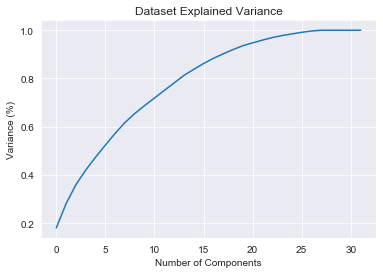

In [117]:
#Plotting the Cumulative Summation of the Explained Variance
pca = PCA().fit(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.grid()
plt.show()

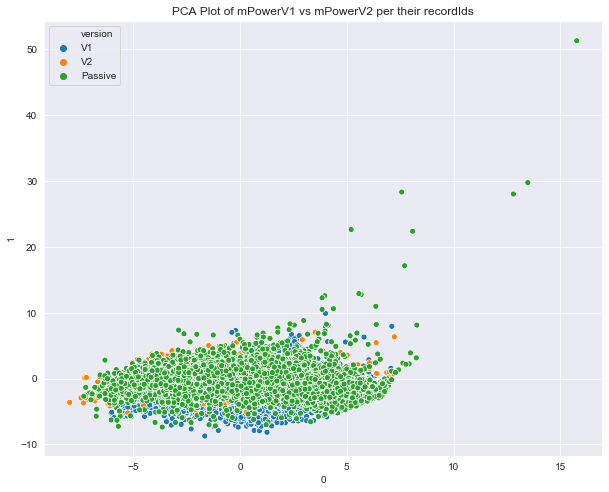

In [118]:
plt.figure(figsize=(10,8))
sns.scatterplot(principal_df[0], principal_df[1], hue = principal_df["version"])
plt.title("PCA Plot of mPowerV1 vs mPowerV2 per their recordIds")
plt.grid()
plt.show()

# PCA healthCodes

In [128]:
grouped_df_v1 = pd.read_csv("../Data/MAX_WALKING_TRAINING_DATA.csv").drop(["healthCode"], axis = 1)
grouped_df_v2 = pd.read_csv("../Data/MAX_WALKING_TRAINING_DATA_V2.csv").drop(["healthCode"], axis = 1)
# grouped_df_passive = pd.read_csv("../Data/MAX_WALKING_TRAINING_DATA_PASSIVE.csv").drop(["healthCode"], axis = 1)

In [129]:
grouped_df_v1["version"] = "V1"
grouped_df_v2["version"] = "V2"
# grouped_df_passive["version"] = "Passive"

In [134]:
grouped_data = pd.concat([grouped_df_v1, grouped_df_v2]).reset_index(drop = True)

In [135]:
scaler = StandardScaler()
X = grouped_data.drop(["version", "PD"], axis = 1)
y = grouped_data[["version", "PD"]]

In [136]:
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components = 15)
principal_comp = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data = principal_comp)
principal_df = pd.concat([principal_df, y], axis = 1)

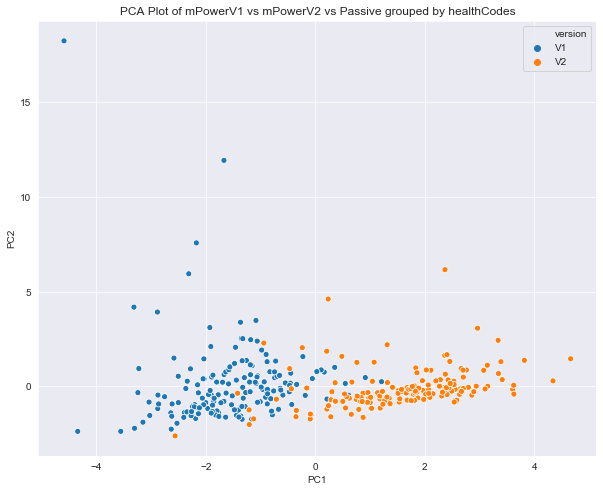

In [137]:
plt.figure(figsize=(10,8))
sns.scatterplot(principal_df[0], principal_df[1], hue = principal_df["version"])
plt.title("PCA Plot of mPowerV1 vs mPowerV2 vs Passive grouped by healthCodes")
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.grid()
plt.show()

# T-Sne

In [108]:
X_embedded = TSNE(n_components=2).fit_transform(X_scaled)

In [109]:
tSNE_df = pd.DataFrame(data = X_embedded,)
tSNE_df = pd.concat([tSNE_df, data[["version", "PD"]]], axis = 1)

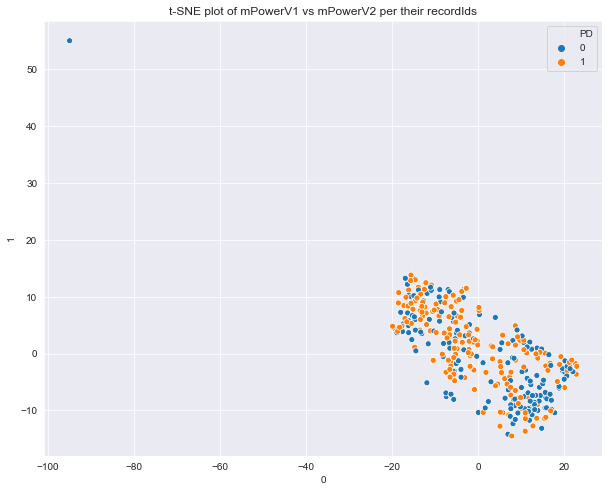

In [110]:
plt.figure(figsize=(10,8))
sns.scatterplot(tSNE_df[0], tSNE_df[1], hue = tSNE_df["PD"])
plt.title("t-SNE plot of mPowerV1 vs mPowerV2 per their recordIds")
plt.grid()
plt.show()